In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Function to load images and label them as fresh (0) or rotten (1)
def load_fresh_rotten_data():
    X = []  # List to store image data
    Y = []  # List to store labels
    base_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'  # Base directory for the dataset

    # List of fresh fruit folders
    fresh_folders = ['freshapples', 'freshbanana', 'freshoranges']
    # List of rotten fruit folders
    rotten_folders = ['rottenapples', 'rottenbanana', 'rottenoranges']
    
    # Process fresh fruits (label = 0)
    for fresh_folder in fresh_folders:
        path = os.path.join(base_dir, fresh_folder)  # Path to each fresh fruit folder
        for img_name in tqdm(os.listdir(path)):  # Iterate over each image in the folder
            img = cv2.imread(os.path.join(path, img_name))  # Read the image
            img = cv2.resize(img, (100, 100))  # Resize to 100x100
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            X.append(img)  # Add image to the data list
            Y.append(0)  # Fresh label (0)
    
    # Process rotten fruits (label = 1)
    for rotten_folder in rotten_folders:
        path = os.path.join(base_dir, rotten_folder)  # Path to each rotten fruit folder
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            Y.append(1)  # Rotten label (1)
    
    return np.array(X), np.array(Y)  # Return the data and labels as NumPy arrays

# Load the dataset
X, Y = load_fresh_rotten_data()

# Normalize the image data (scale pixel values between 0 and 1)
X = X / 255.0  # Convert pixel values from [0, 255] to [0, 1]

100%|██████████| 1595/1595 [00:16<00:00, 99.34it/s] 


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shape of the data
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (8720, 100, 100, 3)
Validation data shape: (2181, 100, 100, 3)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a binary classification CNN model
model_fresh_rotten = Sequential()

# Convolutional layer 1
model_fresh_rotten.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model_fresh_rotten.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model_fresh_rotten.add(Conv2D(64, (3, 3), activation='relu'))
model_fresh_rotten.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model_fresh_rotten.add(Flatten())

# Fully connected Dense layer
model_fresh_rotten.add(Dense(128, activation='relu'))

# Output layer (binary classification: fresh or rotten)
model_fresh_rotten.add(Dense(1, activation='sigmoid'))

# Compile the model
model_fresh_rotten.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model_fresh_rotten.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,217 (16.61 MB)

 Trainable params: 4,353,217 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model_fresh_rotten.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 66s 236ms/step - accuracy: 0.7382 - loss: 0.5558 - val_accuracy: 0.9198 - val_loss: 0.2036
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 64s 234ms/step - accuracy: 0.9112 - loss: 0.2129 - val_accuracy: 0.9376 - val_loss: 0.1545
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 64s 234ms/step - accuracy: 0.9326 - loss: 0.1668 - val_accuracy: 0.9074 - val_loss: 0.2200
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 64s 235ms/step - accuracy: 0.9543 - loss: 0.1143 - val_accuracy: 0.9390 - val_loss: 0.1506
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 82s 234ms/step - accuracy: 0.9574 - loss: 0.1021 - val_accuracy: 0.9555 - val_loss: 0.1114
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 64s 233ms/step - accuracy: 0.9715 - loss: 0.0755 - val_accuracy: 0.9578 - val_loss: 0.1166
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 64s 233ms/step - accuracy: 0.9714 - loss: 0.0772 - val_accuracy: 0.9642 - val_loss: 0.0867
Epoch 8/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 64s 234ms/step - accuracy: 0.9797 - loss: 0

In [6]:
val_loss, val_acc = model_fresh_rotten.evaluate(X_val, Y_val)

# Print validation accuracy
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9681 - loss: 0.0879
Validation Accuracy: 97.02%


In [7]:
model_fresh_rotten.save('fresh_rotten_classifier.h5')

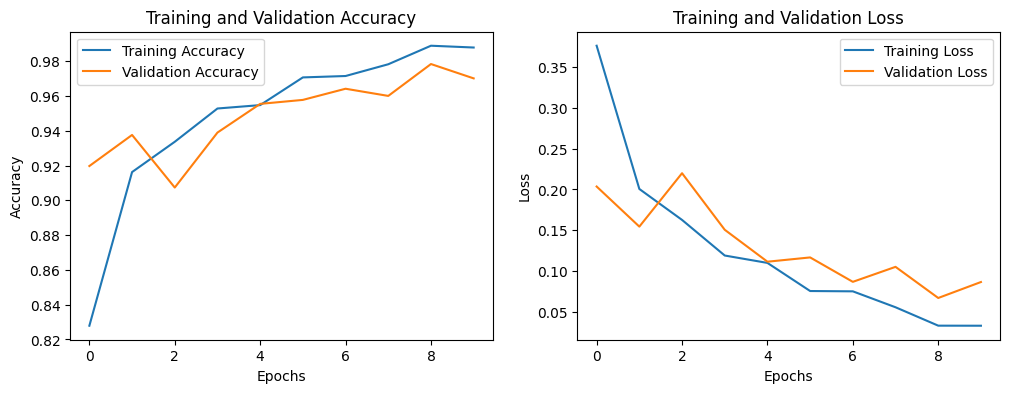

In [8]:
import matplotlib.pyplot as plt  # For displaying images

# Function to plot training and validation accuracy/loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot training and validation history
plot_training_history(history)


69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step


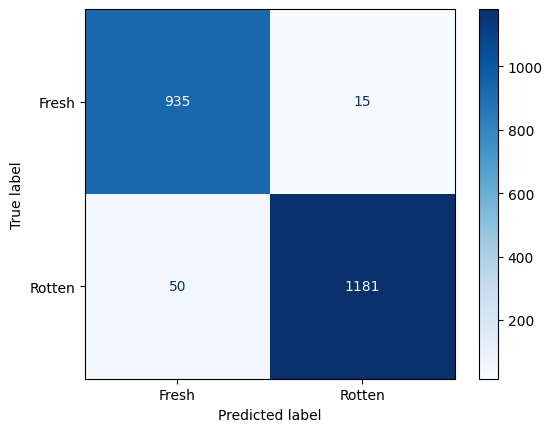

In [9]:
import matplotlib.pyplot as plt  # For displaying images

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the validation set
Y_pred = model_fresh_rotten.predict(X_val)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute confusion matrix
cm = confusion_matrix(Y_val, Y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fresh', 'Rotten'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [12]:
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the image for prediction
def load_image_for_prediction(img_path):
    img = image.load_img(img_path, target_size=(100, 100))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    img_array = img_array / 255.0  # Normalize the image

    return img_array

# Function to predict if the fruit is fresh or rotten
def predict_fresh_or_rotten(model, img_path):
    img_array = load_image_for_prediction(img_path)
    prediction = model.predict(img_array)

    if prediction > 0.5:
        return 'Rotten'
    else:
        return 'Fresh'

# Example usage:
# img_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png'
img_path = '/kaggle/input/sample-data/apple.jpeg'
result = predict_fresh_or_rotten(model_fresh_rotten, img_path)
print(f"The fruit is: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The fruit is: Fresh


## Checking with test data

In [13]:
def load_test_data():
    X_test = []
    Y_test = []
    test_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test'

    # Define the folders for fresh and rotten test images
    fresh_folders = ['freshapples', 'freshbanana', 'freshoranges']
    rotten_folders = ['rottenapples', 'rottenbanana', 'rottenoranges']

    # Load fresh images (label = 0)
    for fresh_folder in fresh_folders:
        path = os.path.join(test_dir, fresh_folder)
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X_test.append(img)
            Y_test.append(0)  # Label: Fresh (0)

    # Load rotten images (label = 1)
    for rotten_folder in rotten_folders:
        path = os.path.join(test_dir, rotten_folder)
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X_test.append(img)
            Y_test.append(1)  # Label: Rotten (1)

    return np.array(X_test), np.array(Y_test)

# Load the test dataset
X_test, Y_test = load_test_data()

# Normalize the test images
X_test = X_test / 255.0

100%|██████████| 403/403 [00:06<00:00, 59.08it/s]


85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step


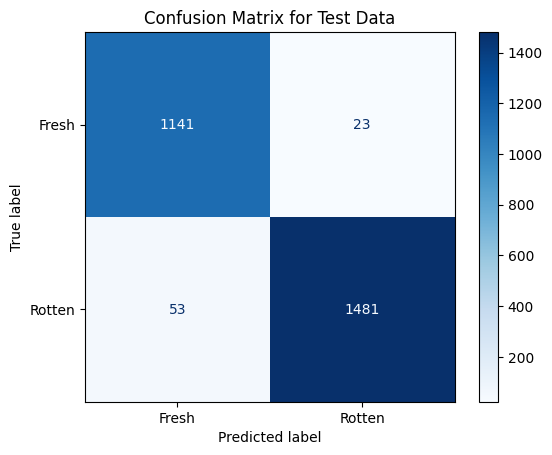

In [14]:
# Get predictions for the test set
Y_pred_test = model_fresh_rotten.predict(X_test)
Y_pred_test = (Y_pred_test > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute confusion matrix
cm_test = confusion_matrix(Y_test, Y_pred_test)

# Display confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Fresh', 'Rotten'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Data')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The fruit is: Fresh


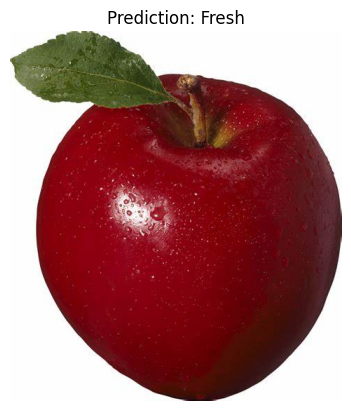

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the uploaded image for prediction
def load_image_for_prediction(img_path):
    img = image.load_img(img_path, target_size=(100, 100))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    img_array = img_array / 255.0  # Normalize the image

    return img_array

# Function to predict if the fruit is fresh or rotten
def predict_fresh_or_rotten(model, img_path):
    img_array = load_image_for_prediction(img_path)
    prediction = model.predict(img_array)

    if prediction > 0.5:
        return 'Rotten'
    else:
        return 'Fresh'

# Example usage:
# img_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenoranges/Screen Shot 2018-06-12 at 11.21.54 PM.png'  # Path to the uploaded image
img_path = '/kaggle/input/sample-data/apple.jpeg'
result = predict_fresh_or_rotten(model_fresh_rotten, img_path)
print(f"The fruit is: {result}")

# Optionally display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {result}')
plt.axis('off')
plt.show()

### Fruits Classification Model

In [3]:
import os
import numpy as np
import cv2
from tqdm import tqdm

def load_fruit_data():
    X = []
    Y = []
    base_dir = 'E://Suman//Anurag project//demo//dataset//train'  # Update path as needed

    # Define categories
    categories = ['freshapples', 'freshbanana', 'freshoranges', 
                  'rottenapples', 'rottenbanana', 'rottenoranges']

    # Load images and their corresponding labels
    for category in categories:
        path = os.path.join(base_dir, category)
        label = category  # Using category as the label
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            Y.append(label)  # Store the full label (e.g., "freshapples")

    return np.array(X), np.array(Y)

# Load the dataset
X, Y = load_fruit_data()

# Normalize the images
X = X / 255.0

100%|██████████| 1595/1595 [00:16<00:00, 97.89it/s] 


In [4]:
import collections
print(collections.Counter(Y))  # Check the class distribution

Counter({'rottenapples': 2342, 'rottenbanana': 2224, 'freshapples': 1693, 'rottenoranges': 1595, 'freshbanana': 1581, 'freshoranges': 1466})


In [5]:
from sklearn.model_selection import train_test_split

# Encode the labels into numerical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Split the dataset
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

def build_fruit_classification_model():
    model = Sequential()
    model.add(Input(shape=(100, 100, 3)))  # Specify input shape here
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Use softmax for multi-class classification
    return model

# Build the model
model_fruit = build_fruit_classification_model()

In [7]:
from sklearn.utils import class_weight
import numpy as np

# Class counts from your dataset
class_counts = {
    'rottenapples': 2342,
    'rottenbanana': 2224,
    'freshapples': 1693,
    'rottenoranges': 1595,
    'freshbanana': 1581,
    'freshoranges': 1466
}

# Convert the counts into an array
counts = np.array(list(class_counts.values()))

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', 
                                                  classes=np.unique(list(class_counts.keys())), 
                                                  y=np.repeat(list(class_counts.keys()), counts))

# Assign the weights in the order you mentioned
class_weights_dict = {
    0: class_weights[0],  # 'rottenapples'
    1: class_weights[1],  # 'rottenbanana'
    2: class_weights[2],  # 'freshapples'
    3: class_weights[3],  # 'rottenoranges'
    4: class_weights[4],  # 'freshbanana'
    5: class_weights[5],  # 'freshoranges'
}

print("Class Weights: ", class_weights_dict)

# Compile the model
model_fruit.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history_fruit = model_fruit.fit(X_train, Y_train, 
                                epochs=20, 
                                validation_data=(X_val, Y_val),
                                class_weight=class_weights_dict)  # Apply class weights here

Class Weights:  {0: 1.073144319747982, 1: 1.149167193759224, 2: 1.23931332423829, 3: 0.7757614574437802, 4: 0.8169214628297362, 5: 1.139080459770115}
Epoch 1/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 38s 128ms/step - accuracy: 0.6225 - loss: 0.9876 - val_accuracy: 0.8615 - val_loss: 0.3796
Epoch 2/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 31s 113ms/step - accuracy: 0.8644 - loss: 0.3720 - val_accuracy: 0.9143 - val_loss: 0.2466
Epoch 3/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - accuracy: 0.9015 - loss: 0.2753 - val_accuracy: 0.9386 - val_loss: 0.1640
Epoch 4/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 37s 137ms/step - accuracy: 0.9197 - loss: 0.2232 - val_accuracy: 0.9340 - val_loss: 0.1816
Epoch 5/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 37s 136ms/step - accuracy: 0.9353 - loss: 0.1848 - val_accuracy: 0.9560 - val_loss: 0.1225
Epoch 6/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 37s 136ms/step - accuracy: 0.9465 - loss: 0.1588 - val_accuracy: 0.9376 - val_loss: 0.1711
Epoch 7/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 37s 136ms/step - accurac

In [8]:
loss, accuracy = model_fruit.evaluate(X_val, Y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9698 - loss: 0.0930
Validation Loss: 0.0913, Validation Accuracy: 0.9720


In [9]:
model_fruit.save('fruit_classification_model1.h5')

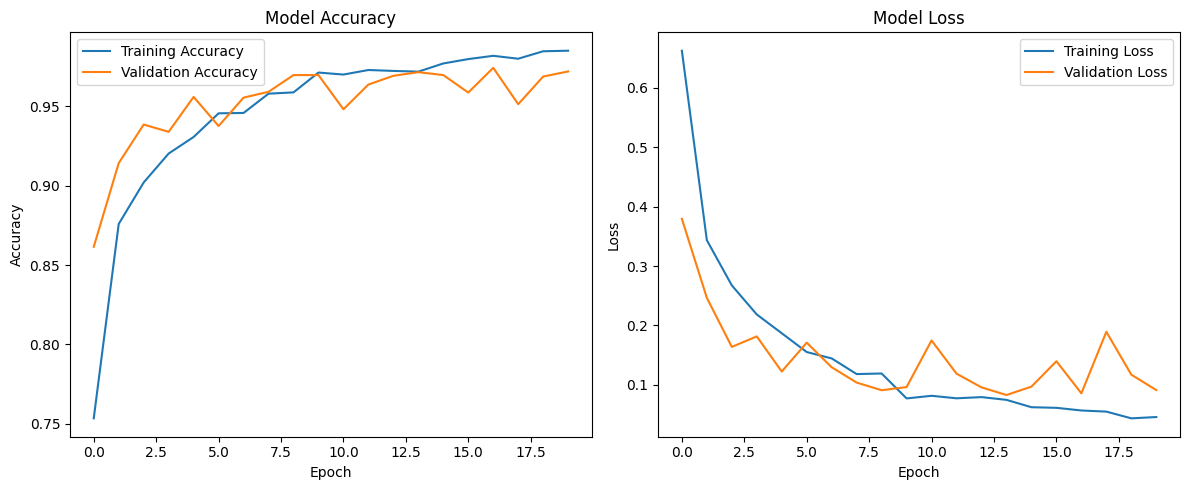

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fruit.history['accuracy'], label='Training Accuracy')
plt.plot(history_fruit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_fruit.history['loss'], label='Training Loss')
plt.plot(history_fruit.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


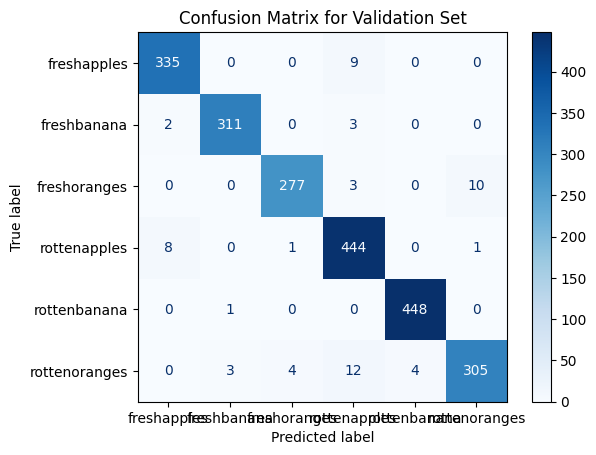

In [11]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the validation set
Y_pred_val = model_fruit.predict(X_val)
Y_pred_val_classes = np.argmax(Y_pred_val, axis=1)  # Convert probabilities to class predictions

# Compute confusion matrix
cm_val = confusion_matrix(Y_val, Y_pred_val_classes)

# Display confusion matrix
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=label_encoder.classes_)
disp_val.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Validation Set')
plt.show()

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_image_for_prediction(img_path, target_size=(100, 100)):
    # Load the image from the path
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model's expected input shape (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image data (scale pixel values between 0 and 1)
    img_array = img_array / 255.0
    return img_array


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The fruit is: freshapples


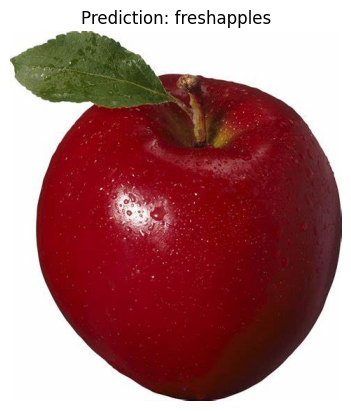

In [28]:
categories = ['freshapples', 'freshbanana', 'freshoranges', 
              'rottenapples', 'rottenbanana', 'rottenoranges']

def predict_fruit_category(model, img_path):
    # Load and preprocess the image
    img_array = load_image_for_prediction(img_path)  
    # Make a prediction
    prediction = model.predict(img_array)
    # Get the label with the highest predicted probability
    predicted_label = categories[np.argmax(prediction)]
    return predicted_label  # Return the label (e.g., "freshapples", "rottenapples")
# Example usage:
# img_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train/rottenoranges/Screen Shot 2018-06-12 at 11.20.13 PM.png'  # Path to the uploaded image
img_path = '/kaggle/input/sample-data/apple.jpeg'
result = predict_fruit_category(model_fruit, img_path)
print(f"The fruit is: {result}")

# Display the image with the prediction
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {result}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
The fruit is: freshapples


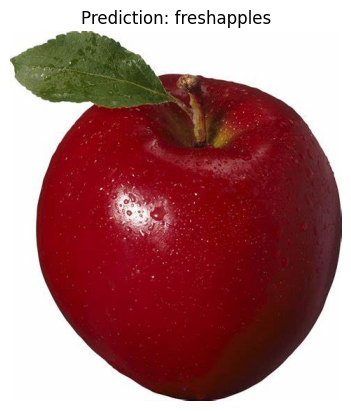

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model_fruit = load_model('fruit_classification_model1.h5')

# Define categories
categories = ['freshapples', 'freshbanana', 'freshoranges', 
              'rottenapples', 'rottenbanana', 'rottenoranges']

def load_image_for_prediction(img_path, target_size=(100, 100)):
    # Load the image from the path
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image data
    img_array = img_array / 255.0
    return img_array

def predict_fruit_category(model, img_path):
    # Load and preprocess the image
    img_array = load_image_for_prediction(img_path)  
    # Make a prediction
    prediction = model.predict(img_array)
    # Get the label with the highest predicted probability
    predicted_label = categories[np.argmax(prediction)]
    return predicted_label

# Example usage
img_path = 'validate/apple.jpeg'  # Update this path
result = predict_fruit_category(model_fruit, img_path)
print(f"The fruit is: {result}")

# Display the image with the prediction
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {result}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The fruit is: rottenbanana with confidence: 1.00


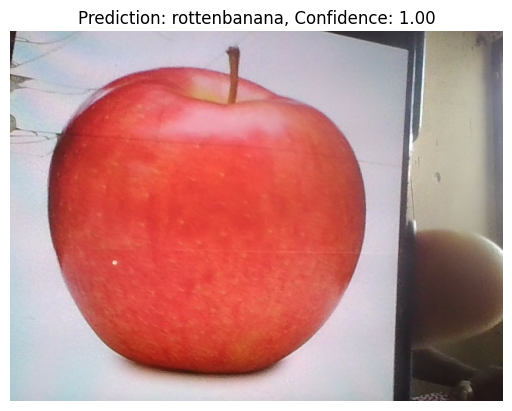

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model_fruit = load_model('fruit_classification_model1.h5')

# Define categories
categories = ['freshapples', 'freshbanana', 'freshoranges', 
              'rottenapples', 'rottenbanana', 'rottenoranges']

def load_image_for_prediction(img_array, target_size=(100, 100)):
    # Resize the image
    img = cv2.resize(img_array, target_size)
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image data
    img_array = img_array / 255.0
    return img_array

def predict_fruit_category(model, img_array):
    # Load and preprocess the image
    img_array = load_image_for_prediction(img_array)  
    # Make a prediction
    prediction = model.predict(img_array)
    # Get the label with the highest predicted probability
    predicted_label_index = np.argmax(prediction)
    predicted_label = categories[predicted_label_index]
    predicted_probability = prediction[0][predicted_label_index]

    return predicted_label, predicted_probability

# Start video capture
cap = cv2.VideoCapture(0)  # Use 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Show the frame
    cv2.imshow('Fruit Classification', frame)

    # Wait for key press
    key = cv2.waitKey(1) & 0xFF

    # Capture the image when 'c' is pressed
    if key == ord('c'):
        result, probability = predict_fruit_category(model_fruit, frame)
        # Check if the confidence is above a certain threshold (e.g., 0.5)
        if probability > 0.5:  # Adjust this threshold as needed
            print(f"The fruit is: {result} with confidence: {probability:.2f}")

            # Display the captured image with Matplotlib
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f'Prediction: {result}, Confidence: {probability:.2f}')
            plt.axis('off')
            plt.show()

        else:
            print("Confidence too low for prediction.")

    # Break the loop on 'q' key press
    if key == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


In [ ]:
import os
import time
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from IPython.display import clear_output  # Import for clearing output

# Load the saved model
model_fruit = load_model('fruit_classification_model1.h5')

# Define categories
categories = ['freshapples', 'freshbanana', 'freshoranges', 
              'rottenapples', 'rottenbanana', 'rottenoranges']

def load_image_for_prediction(img_path, target_size=(100, 100)):
    """Load and preprocess the image for prediction."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize
    return img_array

def predict_fruit_category(model, img_path):
    """Make a prediction on the given image."""
    img_array = load_image_for_prediction(img_path)
    prediction = model.predict(img_array)
    predicted_label_index = np.argmax(prediction)
    predicted_label = categories[predicted_label_index]
    predicted_probability = prediction[0][predicted_label_index]
    return predicted_label, predicted_probability

# Directory to monitor
image_dir = "captured_images"

# Start monitoring the directory
print("Monitoring the directory for new images...")
while True:
    # Get all image files in the directory
    image_files = glob.glob(os.path.join(image_dir, "image-*.jpg"))

    if image_files:
        for img_path in image_files:
            print(f"Processing image: {img_path}")
            
            # Make a prediction
            result, probability = predict_fruit_category(model_fruit, img_path)

            # Debugging output
            print(f"Predicted label: {result}, Probability: {probability:.2f}")

            # Print result if confidence is above a certain threshold
            if probability > 0.5:
                print(f"The fruit is: {result} with confidence: {probability:.2f}")
                
                # Display the captured image with Matplotlib
                img = cv2.imread(img_path)
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title(f'Prediction: {result}, Confidence: {probability:.2f}')
                plt.axis('off')
                plt.show()
            else:
                print("Confidence too low for prediction.")

            # Delete the image after processing
            # os.remove(img_path)
            # print(f"Deleted image: {img_path}")

            # Clear the output and wait before processing the next image
            clear_output(wait=True)  # Clear output in Jupyter Notebook/VS Code
            time.sleep(3)  # Wait for 3 seconds before the next prediction

    else:
        print("No new images found. Checking again...")
        time.sleep(1)  # Wait a bit before checking again
